In [1]:
# Understanding models - helps with selecting appropriate model, good set of hyperparameters, debugging, error analysis ...
# Linear Regression model - simple model
# Two ways to train it: closed-form equation - directly compyte the model parameters that best fit the training set (minimize cost function)
# 2) Interative optimization approach - Gradient Descent

In [2]:
# Linear model - makes a prediction by computing a weighted sum of the input features + a constant (called bias/intercept term)
# To train the model - need to have accuracy measure - e.g. RMSE:
# Need to find the value of all parameters that minimise RMSE
# in practive - simpler to minize MSE

In [3]:
# Normal Equation - methematical equation that gives a closed-form solutions which gives the result directly
# Generate some linear-looking data:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [4]:
# Lets find the parameters using the Normal Equation
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
# Equation from the book, p. 116
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[3.98091634]
 [3.09734667]]


In [5]:
# Can perform predictions
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)

print(y_predict)

[[ 3.98091634]
 [10.17560969]]


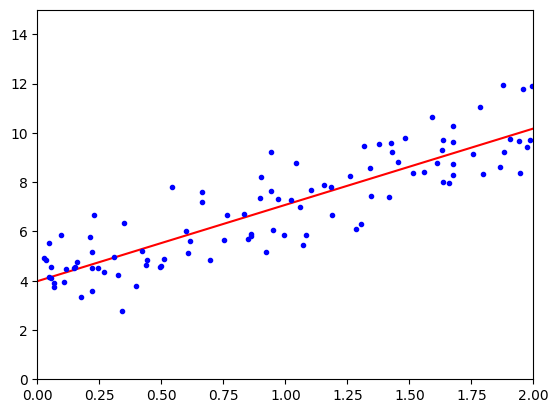

In [6]:
# Plotting model's predictions:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
# Let's do the same using Scikit-Learn:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.98091634]), array([[3.09734667]]))

In [8]:
# prediction:
lin_reg.predict(X_new)

array([[ 3.98091634],
       [10.17560969]])

In [9]:
# Lin.Reg. class is based on scipy.lingalg.lstsq() function - least squares
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.98091634],
       [3.09734667]])

In [10]:
# This function computes Normal Equation usnig the pseudoinverse of X - np.linalg.pinv()
# Using pseudoinverse - more efficient and handles edge cases nicely
np.linalg.pinv(X_b).dot(y)

array([[3.98091634],
       [3.09734667]])

In [11]:
# Comp. Complexity:
# inverse of X_trans*X - (n+1)x(n+1) mastrix (n - number of features)
# inverting such matrix - O(n^2.4)-O(n^3): If you double the number of features, you multiply the computation time by:
# 2^2.4=5.3-2^3=8
# The computations gets very slow when the number of features grows large. But is linear with regards to the number of instances of the training set
# Predictions are very fast - linear growth w.r.t. to features

# For a large number of features another approach might be better -> Gradient descent

In [12]:
# Gradient Descent - Generic optimization algorithm - Tweaks parameters iterativeley to minimize the cost function
# Measures the local gradient of the error function w.r.t. parameter vector Theta, and goes in the direction of descending gradient
# Start with random Theta values (random initialization) and then improve step by step until it converges to a minimum
# Step size - important parameter, determined by the learning rate hyperparam (too small - long convergence time, too big can miss the "valley")

# Challanges: 1) converging to a local minimum (worse than global minimum)
# 2) might take a very long time to cross a plateau - if you stop to early you wont find the global minimum

# Luckily MSE cost function of Lin.Reg - convex function - no local minima (Shape of a bowl)
# Also a continous function with a slope that never changes abruptly
# --> guarantees that G.D. to approach very close to the global minimum

# The scale of features can impact the speed of convergence - unsure that all features have a similar scale

In [13]:
# Batch G.D. - uses the whole batch of training data at every step - terribly slow on vert large data sets
# But scales well with number of features - much faster than Normal Equation or SVD decomposition (when many features)

# You find the features for the next step by: subtracting the "slope" from the last used set of features
# Learning rate can be added in front of the "slope" to determine the size of the "downhill step" (denoted by eta)
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    # Formula from the book - p. 124
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print(theta)

[[3.98091634]
 [3.09734667]]


In [14]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

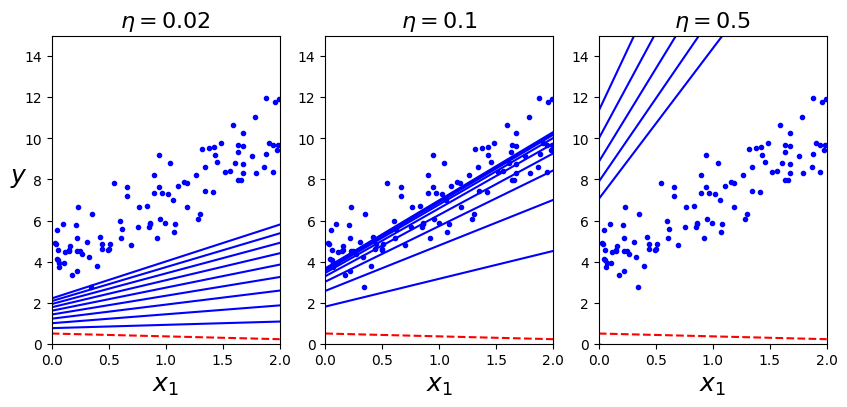

In [15]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

In [16]:
# Three learning rates - left and right show - "poorly" chosen learning rates (left - too slow, right - too large)
# Middle - converged to the minimun in very few learning steps

# Grid Search can be used to find the learning rate - may want to limit the number of iterations to eliminate models that take too long

# How to choose the number of iterations? Can set a very high number of iteration and interrupt the algorithm when the gradient vector becomes tiny
# I.e. when its norm becomes smaller than a tiny number - called tolerance (epsilon) - at that point G.D. (almost) reached the minimum

# Convergence rate  - can take O(1/epsilon) - so if you divide epsilon by ten, the algorithm may have to run about 10 times longer

In [17]:
# Stochastic G.D.
# pick a random instance in the training set at every step and computs gradients based only one that single instance
# Much faster (very little data to manipulate) --> possible to train on huge training sets

# Downside: much less regular than B.G.D. - const function will bounce up and down, decreasing only on average
# Over time will end up close to the minimum but never settle down - final parameters good, but not optimal

# Can help the algorithm jump out of local minima when the cost function is very irregular

# Potential way to avoid the problem - by gradually reducing the learning rate - large steps in the beginning which get smaller and smaller
# akin to simulated annealling - malten metal slowly being cooled down

# Learning schedule - function that determines the training rate at each iteration
# If the learning rate reduced to quickly - stuck in local minimum/halfway to the minimum
# If reduced to slowly - may jump around the minimum for a long time with a suboptimal solution if you halt training too early

In [18]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

Theta:  [[4.00974605]
 [3.09217057]]


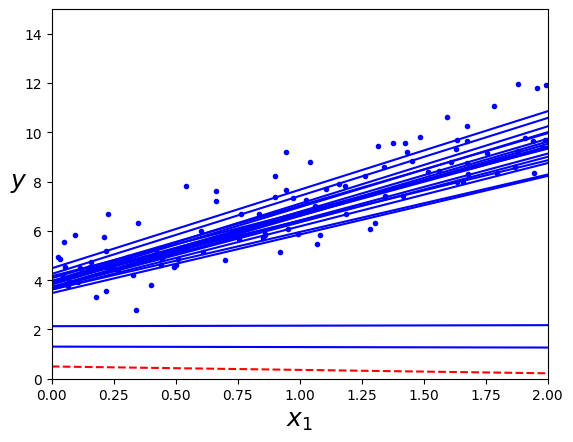

In [19]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style) 
            
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

print("Theta: ", theta)

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown                                # not shown
plt.show()  

In [20]:
# iterate by rounds of m iterations (convention) - each round is called an epoch
# Going through the training set only 50 times and reaches an okay sollution

# Since instances picked randomly - some picked multiple times and some may have never been picked
# If you wan to ensure that the algorithm goes through every instance at each epoch - training set can be shuffled (input features and labels jointly)
# And then go through instance by instance, then shuffle again, etc.
# However, this method generally converges more slowly

# For S.G.D. - training instances need to be independent and identically distributed to ensure convergence toward a global minimum
# E.g. if you sort instances by label - SGD will start by optimizing for one label, and then the next, ... --> not settle close to a global min.

In [21]:
# Can do similar with Scikit-Learn - SGDRegressor vlass - defaults to optimizeing the squared error cost function
# example: max. 1000 epoch or until the loss drops by less than 1e-3 during one epoch
# learning rate: 0.1 (at start) with default learning schedule, without any regularization
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [22]:
# Solution again quite close as before:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.99631744]), array([3.11972517]))

In [23]:
# Mini-batch Gradient Descent
# Like a mixture of the previous two: computes gradients on small random sets of instances called mini-batches
# Advantages: can get perfromance boost from hardware optimazation of matrix operations, esp. with gpus

# Algorithm's progress in parameter space - less eratic than SGD
# Will also get closer to the minimum
# It is harder for it to escape local minima

# Batch GD - takes a lot of time for each step, so SGD/Mini-batch GD can be good alternative when a good learning schedule is used

In [24]:
# Example:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta

array([[4.07005098],
       [3.18642788]])

In [25]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

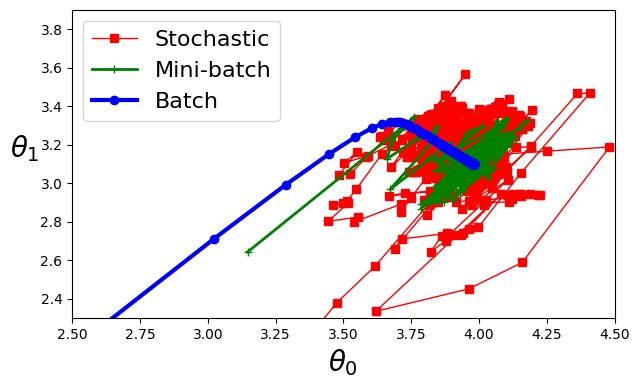

In [26]:
# Evolution of parameters using different learning approaches

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

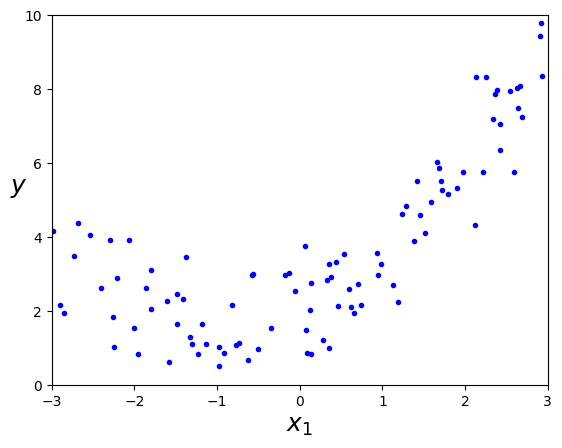

In [27]:
# Polynomial Regression
# Used when data is more complex than a straight line

# Can extend the linear model to fit nonlinear data - e.g. by adding powers of each feature as new features and train that model
# --> Polynomial regression - example:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [28]:
# Use Scikit-Learn's PolynomialFeatures class - taking 2nd degree polynomial
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print("Original feature: ", X[0])
print("Add. feature:", X_poly[0])

Original feature:  [2.38942838]
Add. feature: [2.38942838 5.709368  ]


In [29]:
# Now you can fit a Lin.Reg. model to this extended training data
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

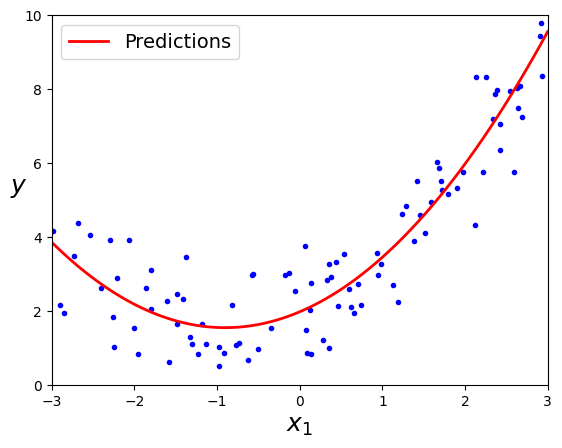

In [30]:
# Let's see predictions
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

In [31]:
# Note: Poly.Reg. can find relationships between features (when there are multiple) - impossible with Lin.Reg
# Why? PolynomialFeatures - adds all combinations of features up to a given degree
# If you have features a and b with Poly.Feat. of degree 3 -> it does not add only a^2 a^3 b^2 and b^3 but also ab a^2b and b^2a

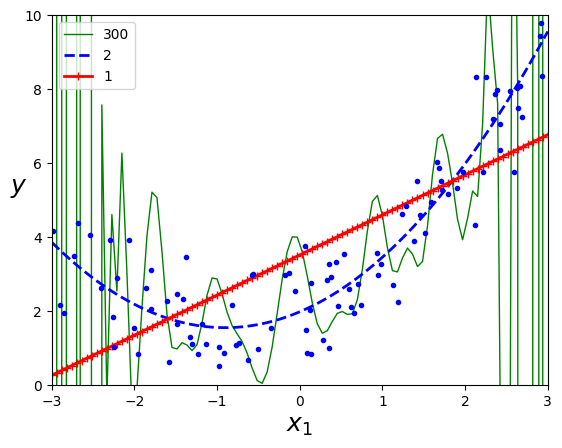

In [32]:
# Learning curves
# High-degree polynomials will likely fit the training data much better than Lin.Reg - Example:
# 300-degree polinomial "wiggles" around training data to fit them better - doesnt generalize well tho

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [33]:
# How to decide on the complexity of the model we are trying to fit?
# cross-validation metrics - model performs well on training data but generalizes poorly - overfitting
# model performs badly on both sides - underfitting

In [34]:
# Another alternative - Learning curves
# plots of model's performance on the training set and the validation set as a function of the training set size/training iteration

# Simply train the model several times on different sized subsets of the training set:

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14) 

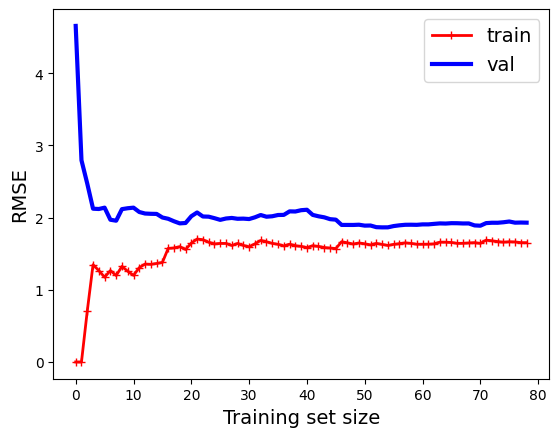

In [35]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [36]:
# Both curves have reached plateau - fairly close and high --> typical for underfitter model

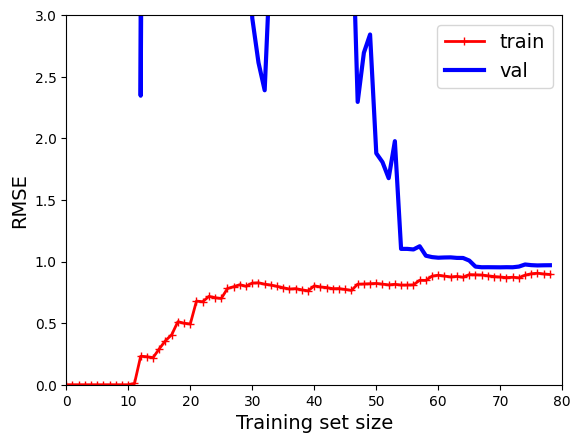

In [37]:
# Let's try 10th-degree polynomial
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
plt.show()   

In [38]:
# Error on the training data is much lower than with the Lin.Reg. model
# There's a gap between the curves - model performs significantly better on the training data than validation data - OVERFITTING
# If you use much larger training set, the two curves would continue to get closer

In [39]:
# Bias/Variance Tradeoff
# Model's generalization error can be expressed as the sum of three very different errors:
# 1) Bias - due to wrong assumptions: e.g. assuming data is linear when it's quadratic - high bias most likely to underfit the model
# 2) Variance - due to model's excessive sensitivity to small variations in the training data 
# --> model with many DOF - likely to have high variance --> overfitting the training data
# 3) Irreducible error - due to the noisiness of the data itself
# - only way reduce - clean up the data: e.g. fix the data sources, such as broken sensors, or to detect and remove outliers

# Tradeoff: increasing model's complexity -> increase variance and reduce its bias, reducing model's complexity - increase bias, reduce variance

In [40]:
# Regularized Linear Models
# means - constraining the model, for polynomial model - reduce the number of polynomial degrees
# for linear model - constraining the weiights of the model

In [41]:
# Ridge Regression (aka Tikhonov regularization)
# - regularized version of Lin.Reg. - regularization term (alpha*sum(thetai^2)) added to the cost function
# - forces a learning algorithm to not only fit the data but also keep the model weights as small as possible
# - alpha: controls how much you want to regularize the model, e.g. at 0 -> Lin. Reg., when large -> all weights end up close to 0 (result - flat line at mean)

# Important note: regularization term should only be added to the cost function during training
# Once the model is trained, you evaluate it's performance using the unregularuzed performance measure

# Quite common that cost function (training) != performance measure (testing)
# another reason: good training cost function should have optimization friendly derivatives, and performance measure should be close to final objective
# e.g. classifier trained using log loss cost function byt evaluated using precision/recall

# Important to scale the data before doing Ridge Reg. - sensitive to scale of the input features (true for most regularized models)

In [42]:
# Example:
# data creation
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [43]:
from sklearn.linear_model import Ridge
# Using closed formed solutions - using matrix factorization (cholesky)
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [44]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55072189]])

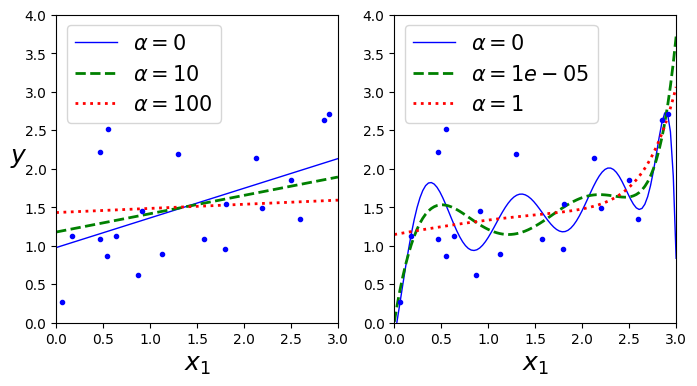

In [45]:
# Plot - effect of different alphas on the model
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

In [46]:
# Left side - Ridge models used on Lin.Reg.
# Right - with Poly.Feat(degree=10), with standard scalar - increasing alpha leads to flatter (less extreme) predictions
# Reduces models variance but increases its bias

In [47]:
# Can also use SGD:
# penalty - l2 - indicates that you want SGD to add regularization term to the cost function equal to half the square of the l2 norm of the weight vector
# -> simply Ridge Regression
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

In [48]:
# Lasso Regression
# = Least Absolute Shrinkage and Selection Operator Regression
# adds a regularization term to the cost function - this time l1 norm = alpha*sum(abs(Theta_i))

C:\Users\ge85diz\OneDrive - TUM\TUM_Documents\TUM\Education\ml_review\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


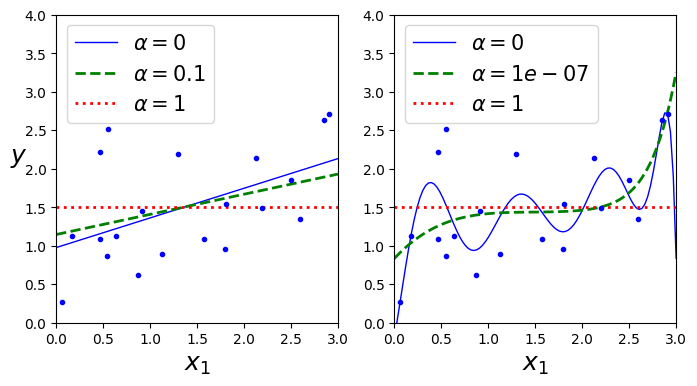

In [49]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

plt.show()

In [50]:
# Lasso Reg. - tends to completely eliminate weights of the least important features - e.g. sets them to 0
# Red dashed line (right) -> all weights for the high degree polynomial features are set to zero
# Basically - automatically performs feature selection and outputs a sparse model (with few nonzero feature weights)

In [51]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [52]:
# On Lasso cost function - BGD tents to bounce across the gutter toward the end
# Why? Slope changes abruptly when one paramater reaches 0 -> need to gradually reduce the learning rate in order to converge

# Lasso cost function not differentiable at Theta_i=0 - GD still works if yiy use a subgradient vecotor g (book page 141)
# it is basically an intermidiate vector between the gradient vecot at the nondifferentiable point

In [53]:
# Elastic net
# Middle ground between Ridge and Lasso Reg
# Regluarization term - mix of both - can control the ratio by r -> r=0 -> Ridge, r=1 -> Lasso
# --> J(theta) = MSE(theta) + r*alpha*norm_1(theta_i) + (1-r)/2*alpha*norm_2(theta_i)

# So when to use normal Lin. Reg? When to add Regularization and which kind?
# Always preferable to have at least a bit of regularization (try to avoid plain linear regression)
# Ridge is a good default, but if you suspect only a few features are useful --> prefer Lasso or Elastic nect
# In general Elastic net is preferred over Lasso since Lasso might behave erratically when number of features > the number of training instances
# or when several features are strongly correlated

In [54]:
# Example of Elastic Net using Scikit-Learn:
from sklearn.linear_model import ElasticNet
# l1_ratio - mix ratio r (above)
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

In [55]:
# Early Stopping
# Different way of regularizing iterative learning algorithms (e.g. Gradient Descent):
# -> by stopping the training as soon as the validation error reaches a minimum

In [56]:
# Example 
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [57]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=0, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

C:\Users\ge85diz\OneDrive - TUM\TUM_Documents\TUM\Education\ml_review\env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\ge85diz\OneDrive - TUM\TUM_Documents\TUM\Education\ml_review\env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\ge85diz\OneDrive - TUM\TUM_Documents\TUM\Education\ml_review\env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\ge85diz\OneDrive - TUM\TUM_Documents\TUM\Education\ml_review\env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: Co

C:\Users\ge85diz\OneDrive - TUM\TUM_Documents\TUM\Education\ml_review\env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\ge85diz\OneDrive - TUM\TUM_Documents\TUM\Education\ml_review\env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\ge85diz\OneDrive - TUM\TUM_Documents\TUM\Education\ml_review\env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\ge85diz\OneDrive - TUM\TUM_Documents\TUM\Education\ml_review\env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: Co

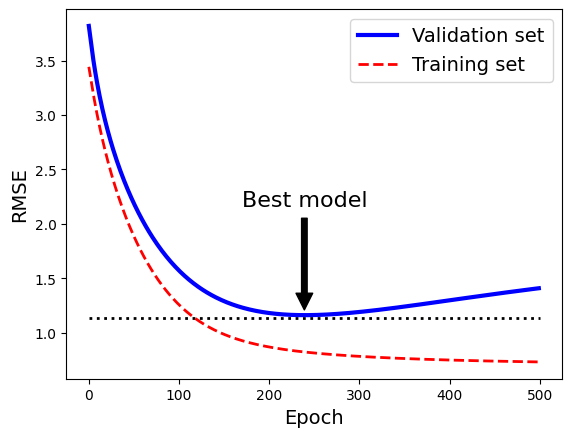

In [58]:
# Create the plot:
sgd_reg = SGDRegressor(max_iter=1, tol=0, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

In [59]:
# As the epochs go by - the algorithm learns and the training error goes down
# In the beginning also the error on validation set goes down, but after a while it stops decreasing
# -> indication that the model is overfitting - should stop the training as son sn the minimum is reached
# --> called beatutiful free lunch (by Geoffrey Hinton)

# One needs to be careful for SDG and Mini-batch GD - curves are not smooth - hard to know if it's true minimum
# -> can stop only after the validation error has been above the minimum for sime time and then roll back the parameters to the min. val. error

In [60]:
# Basic implementation - similar as abivee:
from sklearn.base import clone
# prepare the data
poly_scaler = Pipeline([
                ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
                ("std_scaler", StandardScaler())
            ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# warm_start - when fit() method is called, just continues training where it lef off instead of training from scratch
sgd_reg = SGDRegressor(max_iter=1, tol=0, warm_start=True,
                        penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

C:\Users\ge85diz\OneDrive - TUM\TUM_Documents\TUM\Education\ml_review\env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\ge85diz\OneDrive - TUM\TUM_Documents\TUM\Education\ml_review\env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\ge85diz\OneDrive - TUM\TUM_Documents\TUM\Education\ml_review\env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\ge85diz\OneDrive - TUM\TUM_Documents\TUM\Education\ml_review\env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: Co

In [61]:
print("Best epoch: ", best_epoch, "Best model: ", best_model)

Best epoch:  237 Best model:  SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             tol=0, warm_start=True)


In [62]:
# Logistic Regression (or Logit Regression)
# Commonly used to estimate the probability that an instance belongs to a particular class
# then usually if the probability is more than 50% -> it classifies it as true (binary classifier)

# Computes a weighted sum of the input features (+ a bias term), but instead of outputting the result directly (like Lin. Reg.),
# it outputs the logistic of this result:
# p* = h_theta(x) = sigmoid(x^T*theta) - sigmoid function the outputs a number between 0 and 1
# sigmoid(t) = 1/(1+exp(-t))

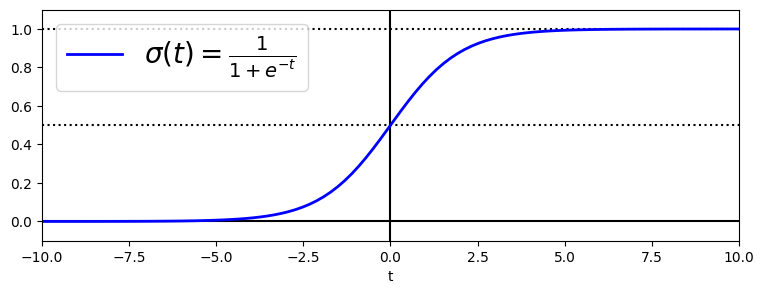

In [63]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

In [64]:
# once you have estimated the probability that x belongs to the positive class, it's easy to make predictions (y)
# if p<0.5 -> y = 0, if p>=0.5 -> y=1

# Notice at sigma(t) < 0.5 when t < 0 and sigma(t) >= 0.5 when t > 0 --> Log. Reg. predicts 1 if x^T*theta is positive
# score t - often called logit - logit function: logit(p) = log(p/(1-p)) - inverse of the logistic function
# also called log-odds - log of the ratio between estimated probability of the positive class and negative cass

In [65]:
# How do Train a Logistic Regression model - to estimate probabilities and makes prediction?
# objective of training - to set the parameter vector Theta so that the model estimates high probabilities for positive instances (y=1)
# and low probabilities for negative instances (y=0)
# Captured by the cost function:
# c(theta) = -log(p*) if y=1, and -log(1-p*) if y=0
# -> -log(t) grows very large when t approaches 0 - cost will be large if the model estimates a probability close to 0 for a positive instance,
#    and it will also be very large if the model estimates a probability close to 1 for a negatice istance

# Cost function over the whole training set is simply the average cost over all training instances
# written in a single expression - called log loss:
# J(theta) = -1/m * sum(y^i*log(p*^i) + (1-y^i)*log(1-p*^i))

# Unfortunately -> no known close-form equation to compute the value of theta that minimizes the cost function
# However, the cost function is convex -> Gradient Descent/Optimization algorithms  are guaranteed to find a global minimum
# Partial derivatives of the cost function can be found in book on p. 146
# For each instance it computes the prediction error and multiplies it by the j^th feature value,
# and then it computes the average over all training instances

# Once you have the gradient vector containing all the partial derivatives - can apply Batch Gradient Descent algorithm
# For SGD - take just once instance, mini-batch GD - use mini-batch at the time

In [66]:
# Decision Boundaries
# using iris dataset - contains sepal and petal length and width of 150 iris flowers of three diferent species
# lets build a classifier to detect one specific type (Iris-Virginica) based only on petal width feature

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [67]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [69]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(int)  # 1 if Iris virginica, else 0

In [70]:
# To be future-proof we set solver="lbfgs" since this will be the default value in Scikit-Learn 0.22
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

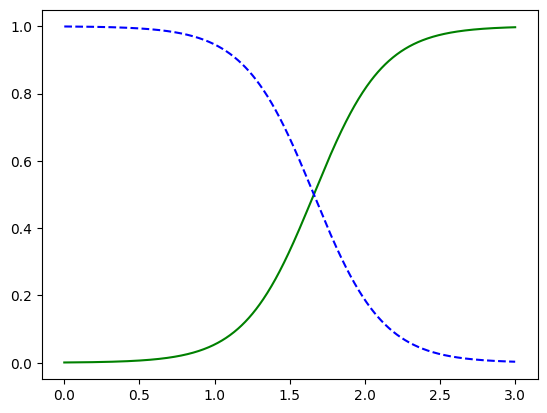

In [72]:
# Model's estimated probabilities for flowers with petal width varying from 0 to 3
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

[1.66066066]


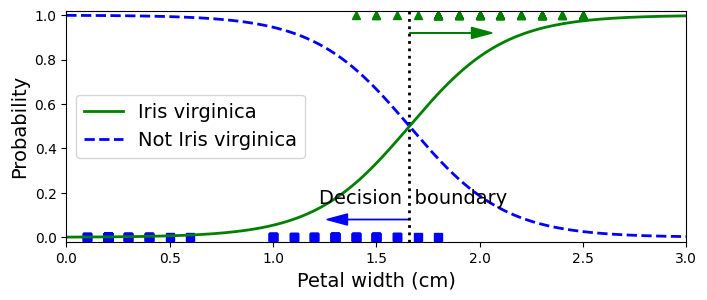

In [79]:
# Fancier figuer
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
print(decision_boundary)


plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary[0], 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary[0], 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [80]:
# Petal width of Iris-Virginica (triangles) - ranges from 1.4 to 2.5 cm,
# while other iris flowers - smaller petal width - 0.1 to 1.8 cm (a bit of overlap)

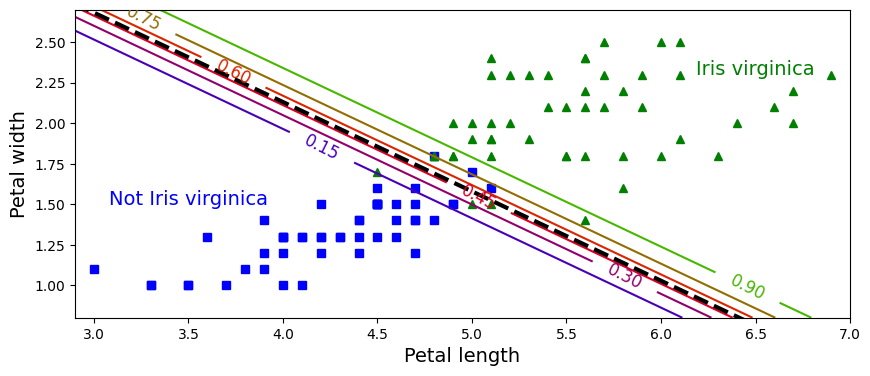

In [82]:
# Let's display the two features - petal width and length
# dashed line reoresebts the points where the model estimates a 50% proabability - model's decision boundary (linear)
# each line represents the points where the modul outputs a specific probability - from 15 to 90% (top right)

from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

In [83]:
# Similarly as other linear models - Logistic Regression models can be regularized using l1 abd l2 penalties
# Scikit-Learn - actually adds an l2 penalty by default